In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load a sample image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.title("Original Image")
plt.show()

# Convert image to grayscale
gray_china = np.dot(china[...,:3], [1, 1, 1])
#gray_china = np.dot(china[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(gray_china)#, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Apply PCA with varying number of components
n_components = [3, 5, 10, 20, 50]
for n in n_components:
    # Fit PCA model
    pca = PCA(n_components=n)
    pca.fit(gray_china)
    
    # Reconstruct image
    compressed = pca.transform(gray_china)
    reconstructed = pca.inverse_transform(compressed)
    
    # Display reconstructed image
    plt.imshow(reconstructed)#, cmap='gray')
    plt.title("Reconstructed Image using {} eigenvectors".format(n))
    plt.show()

# Import dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.transform import resize
import os
import pandas as pd
from skimage import color
from skimage import io
from sklearn.decomposition import PCA
import pickle as pk


In [3]:
data_exp_path = os.getcwd()
pca_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(pca_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

In [4]:
dataset = []

classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for subsection in classes:
    cur_path = original_dataset + '\\' + subsection + '\\'
    for image in os.listdir(cur_path):
        image_path = cur_path + image
        cur_image = plt.imread(image_path).flatten()
        dataset.append(cur_image)
        if counter % 1000 == 0:
            print("Completed", counter)
        counter += 1
            
dataset = np.array(dataset)

Completed 0
Completed 1000
Completed 2000
Completed 3000
Completed 4000
Completed 5000
Completed 6000


In [5]:
path_to_pickle = '../../../pickles/PCA/pca_all.pkl'
with open(path_to_pickle, "rb") as pickle_file:
    pca = pk.load(pickle_file)

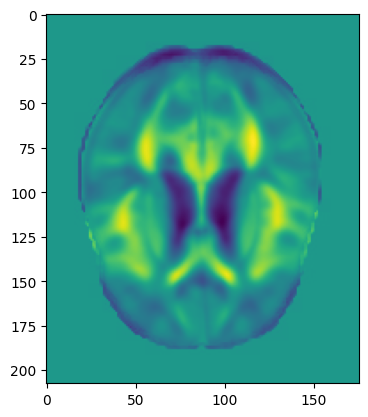

In [6]:
plt.imshow(pca.components_[0].T.reshape(208, 176))

# We have the pickle and dataset now... let's reconstruct some images

In [7]:
print("We have {} eigenvectors to work with".format(len(pca.components_)))

We have 1877 eigenvectors to work with


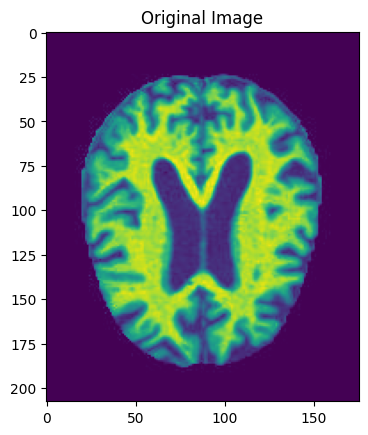

In [8]:
example_image = imread(original_dataset + '\\MildDemented\\' + os.listdir(original_dataset + '\\MildDemented')[0])
plt.title("Original Image")
plt.imshow(example_image)



In [ ]:
fig = plt.figure(figsize=(10,10))

for row, level in enumerate(classes):
    current_path = augmented_dataset + '\\' + level + '\\'
    num_images = len(os.listdir(current_path))
    image_group = [plt.imread(current_path + os.listdir(current_path)[(i * num_images) // 4]) for i in range(4)]
    
    for i in range(len(image_group)):
        fig.add_subplot(len(classes), 4, row * len(classes) + i + 1)
        plt.axis('off')
        title = level + ' ' + str(i + 1)
        plt.title(title)
        plt.imshow(image_group[i])

1877
1877
1877
1877
1877
1877
1877
1877
1877


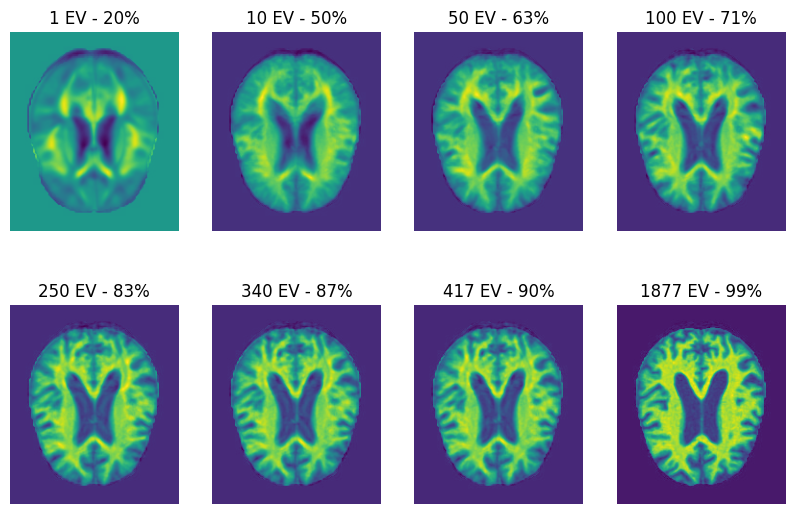

In [29]:
example_image = imread(original_dataset + '\\MildDemented\\' + os.listdir(original_dataset + '\\MildDemented')[0]).flatten()
import math
# Apply PCA with varying number of components
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(len(pca.components_))
fig = plt.figure(figsize=(10,6.5))
n_components = [1, 10, 50, 100, 250, 340, 417, 1877]
image_num = 1
for n in n_components:
    # Fit PCA model

    print(len(pca.components_))
    components = pca.components_[:n, :]
    projected = np.dot(components, example_image.T).T
    reconstructed = np.dot(projected, components)
    
    # Display reconstructed image
    fig.add_subplot(2, 4, image_num)
    plt.title("{} EV - {}%".format(n, math.floor(cumsum[n - 1] * 100)))
    plt.axis('off')
    plt.imshow(reconstructed.reshape(208, 176))
    image_num += 1

In [ ]:
pca.explained_variance_ratio_

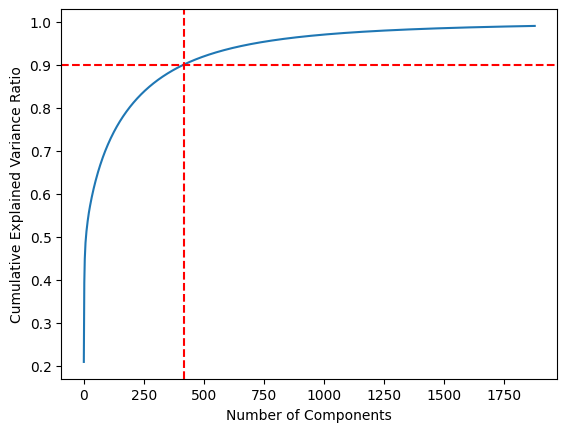

In [10]:
# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")

# Add vertical and horizontal lines at 80% cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.9
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components, color='r', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--')

plt.show()

In [13]:
for index, eigval in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if eigval >= 0.90:
        print(index, eigval)
        print("{} many eigenvalues account for 90% variance".format(index + 1))
        break

416 0.9000995143526713
417 many eigenvalues account for 90% variance
